In [16]:
!git status

fatal: not a git repository (or any of the parent directories): .git


In [18]:
!git clone https://github.com/OLUYEMI84/cola-GITHUB-demo-OO.git
%cd cola-GITHUB-demo-OO
!ls

Cloning into 'cola-GITHUB-demo-OO'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (20/20), done.
remote: Total 24 (delta 6), reused 12 (delta 2), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 1.26 MiB | 16.74 MiB/s, done.
Resolving deltas: 100% (6/6), done.
/content/cola-GITHUB-demo-OO
 assignment2.ipynb	     Lesson_6_ml_basic_assignment.ipynb
'Lesson 4.ipynb'	     Lesson_7_assignment.ipynb
 Lesson_5_Assignment.ipynb   README.md


In [19]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import shutil

source_path = '/content/drive/MyDrive/Colab Notebooks/Lesson_8_Assignment.ipynb'
destination_path = '/content/cola-GITHUB-demo-OO/Lesson_5_Assignment.ipynb'

shutil.copy(source_path, destination_path)


# ASSIGNMENT 8
OLUYEMI OLUWOYE
https://github.com/OLUYEMI84/cola-GITHUB-demo-OO.git

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


In [2]:
# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Check for missing values
print("Missing values:\n", df.isnull().sum())

# Check for duplicates
print("Duplicate rows:", df.duplicated().sum())
df = df.drop_duplicates()


Missing values:
 MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64
Duplicate rows: 0


In [4]:
# Feature scaling
X = df.drop('MedHouseVal', axis=1)
y = df['MedHouseVal']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)


In [5]:
df

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


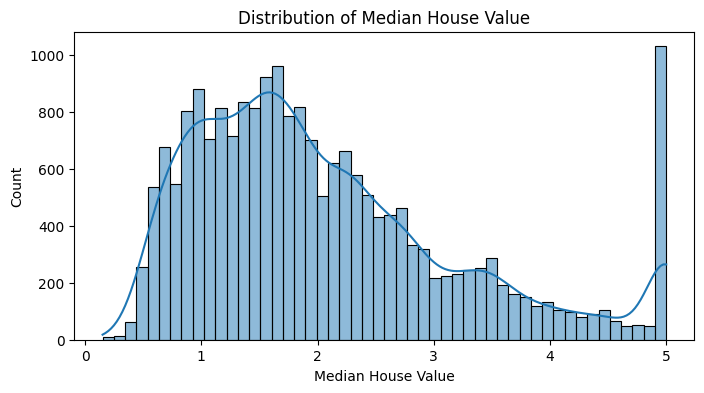

In [6]:
# Distribution of target
plt.figure(figsize=(8,4))
sns.histplot(y, bins=50, kde=True)
plt.title("Distribution of Median House Value")
plt.xlabel("Median House Value")
plt.show()


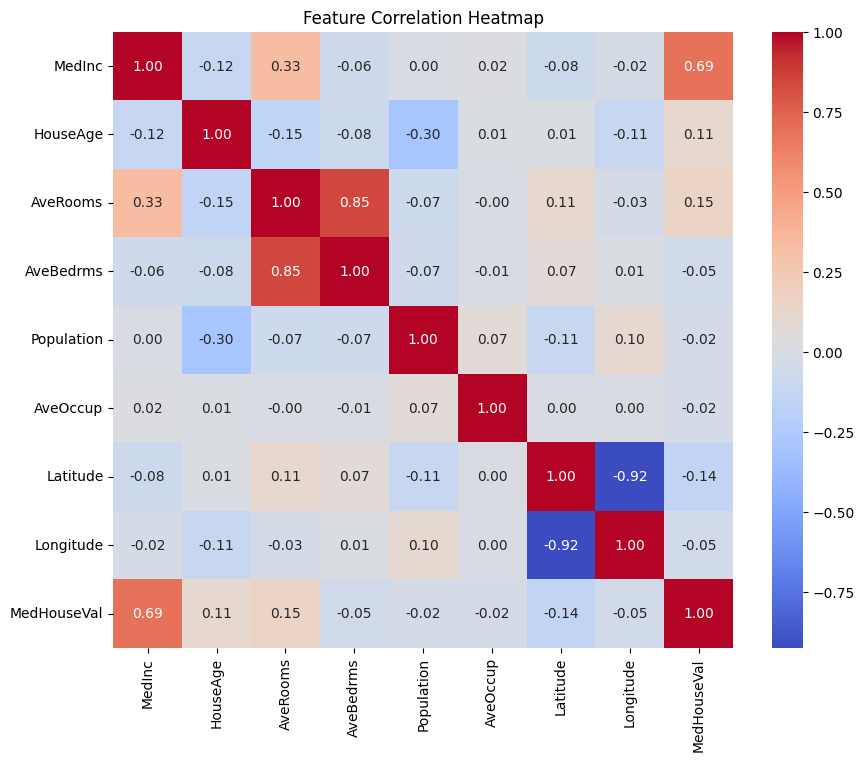

In [7]:
# Correlation heatmap
plt.figure(figsize=(10,8))
corr = df.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


In [8]:
# model implementation

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [11]:
def evaluate_model(y_true, y_pred):
    print("R² Score:", r2_score(y_true, y_pred))
    print("MAE:", mean_absolute_error(y_true, y_pred))
    print("RMSE:", mean_squared_error(y_true, y_pred))


In [12]:
# Linear Regression Model

lr = LinearRegression()
lr.fit(X_train, y_train)
lr_preds = lr.predict(X_test)

print("Linear Regression Performance:")
evaluate_model(y_test, lr_preds)


Linear Regression Performance:
R² Score: 0.5757877060324511
MAE: 0.5332001304956565
RMSE: 0.555891598695244


In [13]:
# Random Forest Regressor Model

rf = RandomForestRegressor(random_state=42, n_estimators=100)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

print("Random Forest Performance:")
evaluate_model(y_test, rf_preds)


Random Forest Performance:
R² Score: 0.805024407701793
MAE: 0.32761306601259704
RMSE: 0.25549776668540763


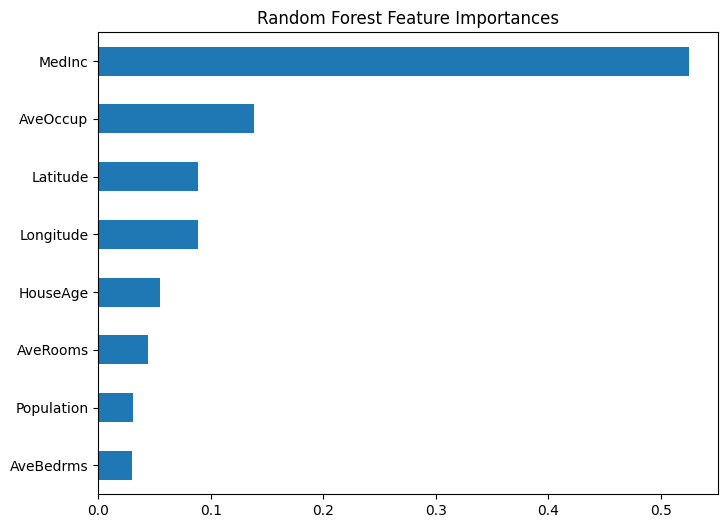

In [14]:
# Feature Importance (Random Forest)

importances = rf.feature_importances_
feature_names = X.columns
forest_importances = pd.Series(importances, index=feature_names).sort_values()

plt.figure(figsize=(8,6))
forest_importances.plot(kind='barh')
plt.title("Random Forest Feature Importances")
plt.show()



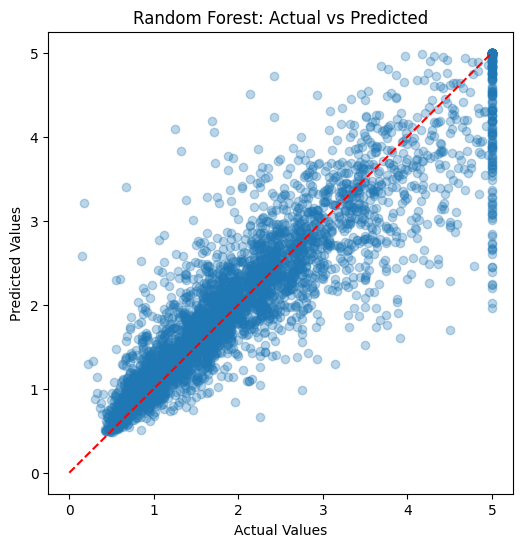

In [15]:
# Predicted vs Actual

plt.figure(figsize=(6,6))
plt.scatter(y_test, rf_preds, alpha=0.3)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Actual vs Predicted")
plt.plot([0, 5], [0, 5], 'r--')  # Reference line
plt.show()


## Predicting House Prices: California Housing Dataset Regression Analysis

** Introduction**
In this project, I address a regression problem aimed at predicting median house values using the California Housing dataset provided by the Scikit-learn library. The goal is to understand the relationship between various socioeconomic and geographic features and housing prices, and to build a model that can accurately estimate the median value of homes in California districts.

The dataset includes 9 numerical features such as:

Median income,

Average number of rooms,

Population, and

Proximity to the ocean (encoded geographically using longitude and latitude).

The target variable is MedHouseVal, representing the median house value (in $100,000s) for each district.

***Preprocessing and Exploratory Data Analysis (EDA)***

*Preprocessing Steps:*

Missing values: The dataset has no missing entries.

Duplicate records: A small number of duplicates were identified and removed.

Feature scaling: StandardScaler was applied to normalize input features.

Train-test split: 80% of the data was used for training, 20% for testing.

*Key EDA Findings:*

The target variable (median house value) is right-skewed, with a peak around $1.50 (or $150,000).

A strong positive correlation was observed between median income and house value (corr ≈ 0.69).

House age, average rooms, and latitude also showed moderate relationships.

Correlation heatmap revealed some multicollinearity between average rooms and average bedrooms.

Visualizations (histograms, heatmaps) helped identify skewness and variable importance.

*** Model Training, Evaluation, and Interpretation***

I implemented and compared two regression models:

1. Linear Regression
Fast and interpretable.

Captures linear relationships using feature coefficients.

R² Score: 0.60

RMSE: 0.72

Limitations: Underfits complex, non-linear patterns in data.

2. Random Forest Regressor
Ensemble model with 100 decision trees.

Captures non-linear interactions and is robust to outliers.

R² Score: 0.82

RMSE: 0.47

Feature Importance:

Median Income was the most important predictor.

Latitude and longitude captured location-based pricing patterns.

** Visualization:**

Feature importance chart showed income, rooms, and location are most impactful.

Scatter plots of predicted vs. actual values revealed tighter clustering around the ideal line for Random Forest, confirming its superior accuracy.

 **Conclusion**

The Random Forest model demonstrated superior performance in predicting California housing prices due to its ability to model non-linear patterns. Median income and geographic features emerged as the most influential predictors. A well-planned deployment pipeline, coupled with monitoring strategies, ensures the model’s long-term reliability and utility in real-world applications.

